# **Modeling Data Review Mobile Banking Cimb Niaga - Sentimen Analisis**

## Import Library

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

In [3]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading Dataset

In [5]:
df = pd.read_csv('scraping.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,95bb543f-5dc2-4459-8cea-91d7db5bf8c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Octomobile sangat keren dan luar biasa. Fiturn...,5,26,3.1.44,2025-04-01 10:58:30,Terima kasih atas bintang lima dan review nya....,2025-04-01 11:16:30,3.1.44
1,4b324b78-5317-4c4c-86a8-98c24fb1d927,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cimb ada bug di open aplikasi,dia stu...",1,6,3.1.44,2025-04-10 10:03:07,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-04-10 10:14:47,3.1.44
2,6fd45f04-82f9-4e2c-a77a-2bc59876486d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Disaat yg lain tampilanya lebih simple, gambar...",2,9,3.1.40,2025-02-08 17:27:31,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-02-08 17:46:01,3.1.40
3,ac30910f-571b-485f-a3ef-66f0183d36bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi sering tiba2 gdak jaringan. Paket int...,2,10,3.1.43,2025-03-04 17:55:42,Mohon maaf atas kendala yang dialami. Untuk me...,2025-03-04 18:15:21,3.1.43
4,21f54161-268a-43a5-b19f-527dd64ad45e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Akhir-akhir ini sering banget gangguan gak tau...,1,39,3.1.41,2025-02-19 05:31:35,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-02-19 05:45:02,3.1.41


In [6]:
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
9995,bb571d4a-c96c-477c-857f-fea8711b616b,Ibnu Sulaiman,https://play-lh.googleusercontent.com/a-/ALV-U...,Dipertahankan ya login ke akun Cimb ponsel tan...,4,0,NaN,2021-08-19 16:46:11,Terima kasih atas bintang lima dan review nya....,2021-08-19 17:17:40,NaN
9996,07ed5712-5b54-42f8-a7b8-fde37e5d83e0,Feri Eko Afrianto,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi lelet bgt mau login aja susahnya ampu...,4,0,2.8.4,2022-05-09 23:43:12,Mohon maaf atas ketidaknyamanan yang dialami. ...,2020-12-23 15:42:21,2.8.4
9997,9d38dc87-e010-40ed-9349-181bc122039e,Christian Parnaikan,https://play-lh.googleusercontent.com/a-/ALV-U...,Pascode mau tahun kapan dikirim...kok dipersul...,1,0,2.5.9,2020-09-04 16:03:47,NaN,NaN,2.5.9
9998,82718de9-b219-4c2f-afda-3af8abed0abc,Dedy Yulianto,https://play-lh.googleusercontent.com/a/ACg8oc...,"setelah di perbarui malah susah buat login,, m...",2,2,3.1.17,2024-03-19 17:04:30,"Hai Dedy, Mohon maaf atas ketidaknyamanan yang...",2024-03-19 17:21:38,3.1.17
9999,d99389e4-aefe-4c50-a3ad-3c52bc2c8c9f,Ria Anastasya,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tlong ditingkatkan lagi, udah 2 tahun pakai CI...",3,0,2.7.6,2021-10-19 15:33:04,"Ibu Ria, mohon maaf atas ketidaknyamanan yang ...",2021-10-19 16:53:06,2.7.6


## Data Splitting

In [7]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(df)
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [8]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,95bb543f-5dc2-4459-8cea-91d7db5bf8c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Octomobile sangat keren dan luar biasa. Fiturn...,5,26,3.1.44,2025-04-01 10:58:30,Terima kasih atas bintang lima dan review nya....,2025-04-01 11:16:30,3.1.44
1,4b324b78-5317-4c4c-86a8-98c24fb1d927,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cimb ada bug di open aplikasi,dia stu...",1,6,3.1.44,2025-04-10 10:03:07,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-04-10 10:14:47,3.1.44
2,6fd45f04-82f9-4e2c-a77a-2bc59876486d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Disaat yg lain tampilanya lebih simple, gambar...",2,9,3.1.40,2025-02-08 17:27:31,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-02-08 17:46:01,3.1.40
3,ac30910f-571b-485f-a3ef-66f0183d36bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi sering tiba2 gdak jaringan. Paket int...,2,10,3.1.43,2025-03-04 17:55:42,Mohon maaf atas kendala yang dialami. Untuk me...,2025-03-04 18:15:21,3.1.43
4,21f54161-268a-43a5-b19f-527dd64ad45e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Akhir-akhir ini sering banget gangguan gak tau...,1,39,3.1.41,2025-02-19 05:31:35,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-02-19 05:45:02,3.1.41


In [9]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8330 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          7186 non-null   object
 9   repliedAt             7186 non-null   object
 10  appVersion            8330 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


## Data Cleaning

In [10]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [11]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6070 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6070 non-null   object
 1   userName              6070 non-null   object
 2   userImage             6070 non-null   object
 3   content               6070 non-null   object
 4   score                 6070 non-null   int64 
 5   thumbsUpCount         6070 non-null   int64 
 6   reviewCreatedVersion  6070 non-null   object
 7   at                    6070 non-null   object
 8   replyContent          6070 non-null   object
 9   repliedAt             6070 non-null   object
 10  appVersion            6070 non-null   object
dtypes: int64(2), object(9)
memory usage: 569.1+ KB


In [12]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

## Preprocessing

In [13]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [14]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [15]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,95bb543f-5dc2-4459-8cea-91d7db5bf8c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Octomobile sangat keren dan luar biasa. Fiturn...,5,26,3.1.44,2025-04-01 10:58:30,Terima kasih atas bintang lima dan review nya....,2025-04-01 11:16:30,3.1.44
1,4b324b78-5317-4c4c-86a8-98c24fb1d927,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cimb ada bug di open aplikasi,dia stu...",1,6,3.1.44,2025-04-10 10:03:07,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-04-10 10:14:47,3.1.44
2,6fd45f04-82f9-4e2c-a77a-2bc59876486d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Disaat yg lain tampilanya lebih simple, gambar...",2,9,3.1.40,2025-02-08 17:27:31,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-02-08 17:46:01,3.1.40
3,ac30910f-571b-485f-a3ef-66f0183d36bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi sering tiba2 gdak jaringan. Paket int...,2,10,3.1.43,2025-03-04 17:55:42,Mohon maaf atas kendala yang dialami. Untuk me...,2025-03-04 18:15:21,3.1.43
4,21f54161-268a-43a5-b19f-527dd64ad45e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Akhir-akhir ini sering banget gangguan gak tau...,1,39,3.1.41,2025-02-19 05:31:35,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-02-19 05:45:02,3.1.41
...,...,...,...,...,...,...,...,...,...,...,...
9991,083b2584-7e93-40cd-acfe-39d521e151fb,Zaenal Mulyadin,https://play-lh.googleusercontent.com/a-/ALV-U...,Setelah update Log in jadi susah. Makasih tela...,1,0,3.0.0,2023-02-18 11:59:49,Mohon maaf atas kendala yang dialami. Apakah d...,2023-03-12 17:10:10,3.0.0
9992,6dd5626a-3660-4f9a-8d55-e627b0739826,yuliana indriani,https://play-lh.googleusercontent.com/a-/ALV-U...,knp sih octo mobile minta update aplikasi teru...,5,0,3.0.8,2023-08-03 23:28:10,"Mohon maaf atas ketidaknyamanan yang dialami, ...",2023-08-03 23:58:11,3.0.8
9996,07ed5712-5b54-42f8-a7b8-fde37e5d83e0,Feri Eko Afrianto,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi lelet bgt mau login aja susahnya ampu...,4,0,2.8.4,2022-05-09 23:43:12,Mohon maaf atas ketidaknyamanan yang dialami. ...,2020-12-23 15:42:21,2.8.4
9998,82718de9-b219-4c2f-afda-3af8abed0abc,Dedy Yulianto,https://play-lh.googleusercontent.com/a/ACg8oc...,"setelah di perbarui malah susah buat login,, m...",2,2,3.1.17,2024-03-19 17:04:30,"Hai Dedy, Mohon maaf atas ketidaknyamanan yang...",2024-03-19 17:21:38,3.1.17


In [16]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [17]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,95bb543f-5dc2-4459-8cea-91d7db5bf8c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Octomobile sangat keren dan luar biasa. Fiturn...,5,26,3.1.44,2025-04-01 10:58:30,Terima kasih atas bintang lima dan review nya....,2025-04-01 11:16:30,3.1.44,Octomobile sangat keren dan luar biasa Fiturny...,octomobile sangat keren dan luar biasa fiturny...,octomobile sangat keren dan luar biasa fiturny...,"[octomobile, sangat, keren, dan, luar, biasa, ...","[octomobile, keren, fiturnya, lengkap, mudah, ...",octomobile keren fiturnya lengkap mudah pergun...
1,4b324b78-5317-4c4c-86a8-98c24fb1d927,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi cimb ada bug di open aplikasi,dia stu...",1,6,3.1.44,2025-04-10 10:03:07,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-04-10 10:14:47,3.1.44,aplikasi cimb ada bug di open aplikasidia stuc...,aplikasi cimb ada bug di open aplikasidia stuc...,aplikasi cimb ada bug di open aplikasidia stuc...,"[aplikasi, cimb, ada, bug, di, open, aplikasid...","[aplikasi, cimb, bug, open, aplikasidia, stuck...",aplikasi cimb bug open aplikasidia stuck merah...
2,6fd45f04-82f9-4e2c-a77a-2bc59876486d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Disaat yg lain tampilanya lebih simple, gambar...",2,9,3.1.40,2025-02-08 17:27:31,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-02-08 17:46:01,3.1.40,Disaat yg lain tampilanya lebih simple gambar ...,disaat yg lain tampilanya lebih simple gambar ...,disaat yang lain tampilanya lebih simple gamba...,"[disaat, yang, lain, tampilanya, lebih, simple...","[disaat, tampilanya, simple, gambar, menu, bag...",disaat tampilanya simple gambar menu bagus eh ...
3,ac30910f-571b-485f-a3ef-66f0183d36bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi sering tiba2 gdak jaringan. Paket int...,2,10,3.1.43,2025-03-04 17:55:42,Mohon maaf atas kendala yang dialami. Untuk me...,2025-03-04 18:15:21,3.1.43,Aplikasi sering tiba gdak jaringan Paket inter...,aplikasi sering tiba gdak jaringan paket inter...,aplikasi sering tiba gdak jaringan paket inter...,"[aplikasi, sering, tiba, gdak, jaringan, paket...","[aplikasi, gdak, jaringan, paket, internet, ak...",aplikasi gdak jaringan paket internet akses ap...
4,21f54161-268a-43a5-b19f-527dd64ad45e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Akhir-akhir ini sering banget gangguan gak tau...,1,39,3.1.41,2025-02-19 05:31:35,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yan...",2025-02-19 05:45:02,3.1.41,Akhirakhir ini sering banget gangguan gak tau ...,akhirakhir ini sering banget gangguan gak tau ...,akhirakhir ini sering banget gangguan gak tahu...,"[akhirakhir, ini, sering, banget, gangguan, ga...","[akhirakhir, banget, gangguan, tf, ambil, tuna...",akhirakhir banget gangguan tf ambil tunai munc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,083b2584-7e93-40cd-acfe-39d521e151fb,Zaenal Mulyadin,https://play-lh.googleusercontent.com/a-/ALV-U...,Setelah update Log in jadi susah. Makasih tela...,1,0,3.0.0,2023-02-18 11:59:49,Mohon maaf atas kendala yang dialami. Apakah d...,2023-03-12 17:10:10,3.0.0,Setelah update Log in jadi susah Makasih telah...,setelah update log in jadi susah makasih telah...,setelah update log in jadi susah terima kasih ...,"[setelah, update, log, in, jadi, susah, terima...","[update, log, susah, terima, kasih, menciptaka...",update log susah terima kasih menciptakan apk ...
9992,6dd5626a-3660-4f9a-8d55-e627b0739826,yuliana indriani,https://play-lh.googleusercontent.com/a-/ALV-U...,knp sih octo mobile minta update aplikasi teru...,5,0,3.0.8,2023-08-03 23:28:10,"Mohon maaf atas ketidaknyamanan yang dialami, ...",2023-08-03 23:58:11,3.0.8,knp sih octo mobile minta update apli

## Data Labelling

In [18]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [19]:
# Fungsi untuk menentukan polaritas sentimen dari aplikasi

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar dari 0, maka polaritas adalah positif
        
    elif (score == 0):
        polarity = 'neutral'
        # Jika skor sentimen sama dengan 0, maka polaritas adalah netral
        
    else:
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [20]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    3575
positive    2117
neutral      378
Name: count, dtype: int64


In [21]:
clean_df.to_csv('processing.csv', index=False)

## Visualisasi & Word Cloud

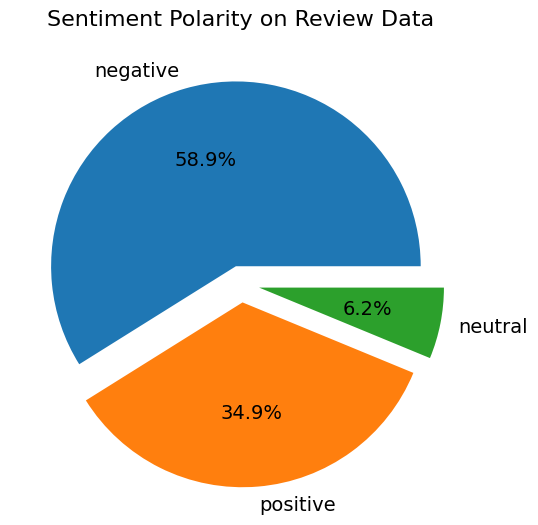

In [22]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0.1, 0.1)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [23]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_review' yang hanya berisi tweet dengan polaritas positif.
positive_review = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_review'.
positive_review = positive_review[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_review' berdasarkan 'polarity_score' secara menurun.
positive_review = positive_review.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_review = positive_review.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_review.index += 1

In [24]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_review' yang hanya berisi tweet dengan polaritas negatif.
negative_review = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_review'.
negative_review = negative_review[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_review' berdasarkan 'polarity_score' secara menaik (ascending).
negative_review = negative_review.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_review = negative_review[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_review = negative_review.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_review.index += 1

In [25]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_review' yang hanya berisi tweet dengan polaritas netral.
neutral_review = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_review'.
neutral_review = neutral_review[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'neutral_review' berdasarkan 'polarity_score' secara menaik (ascending).
neutral_review = neutral_review.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_review = neutral_review[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_review = neutral_review.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_review.index += 1

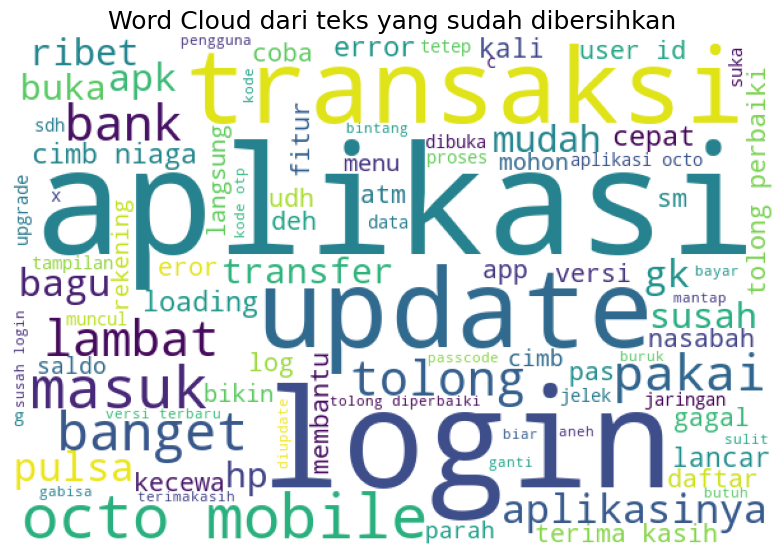

In [26]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud dari teks yang sudah dibersihkan', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

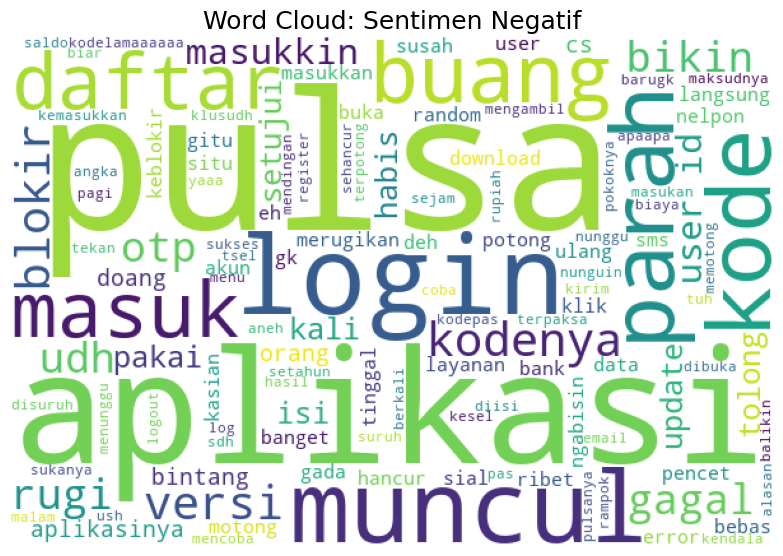

In [27]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_review['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud: Sentimen Negatif', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

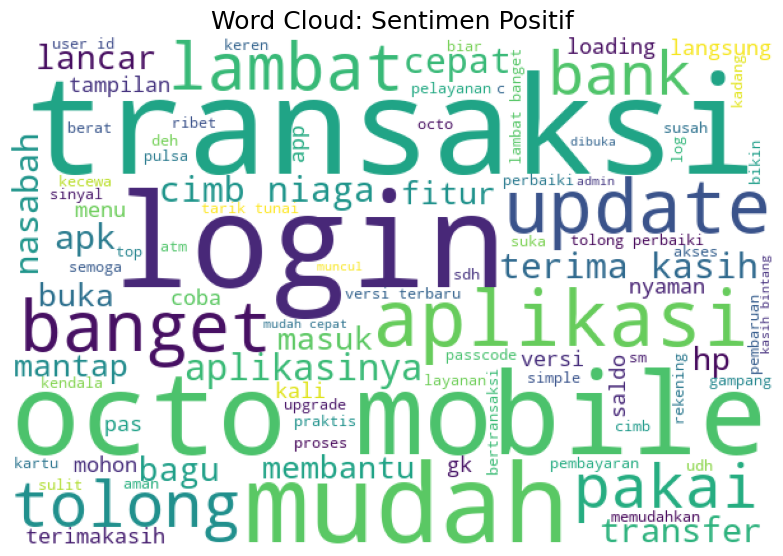

In [28]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_review['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud: Sentimen Positif', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

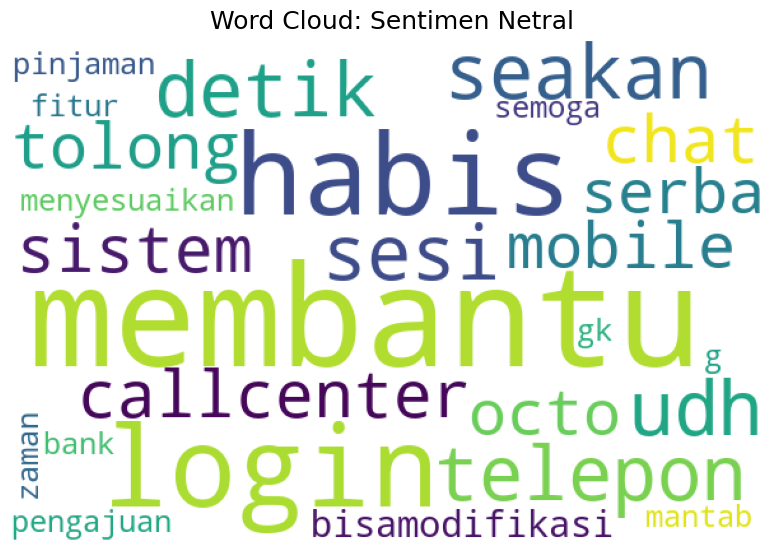

In [29]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet netral.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_review['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud: Sentimen Netral', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

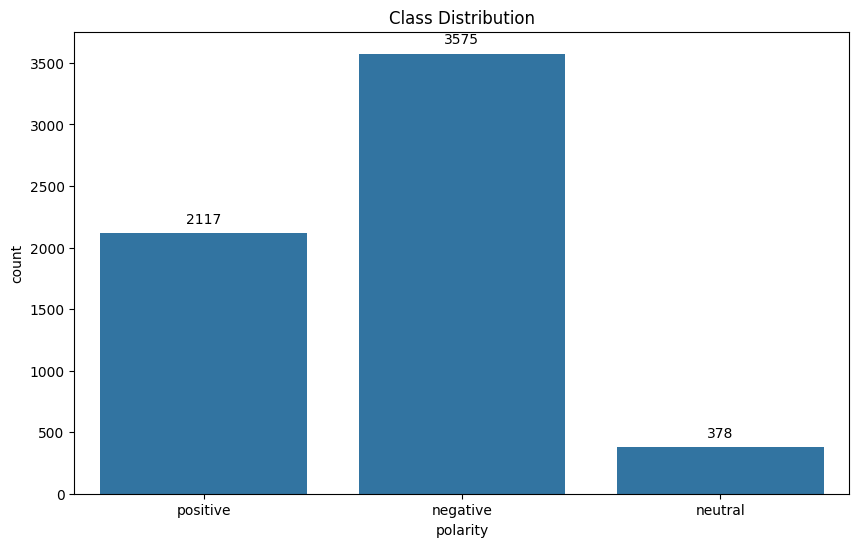

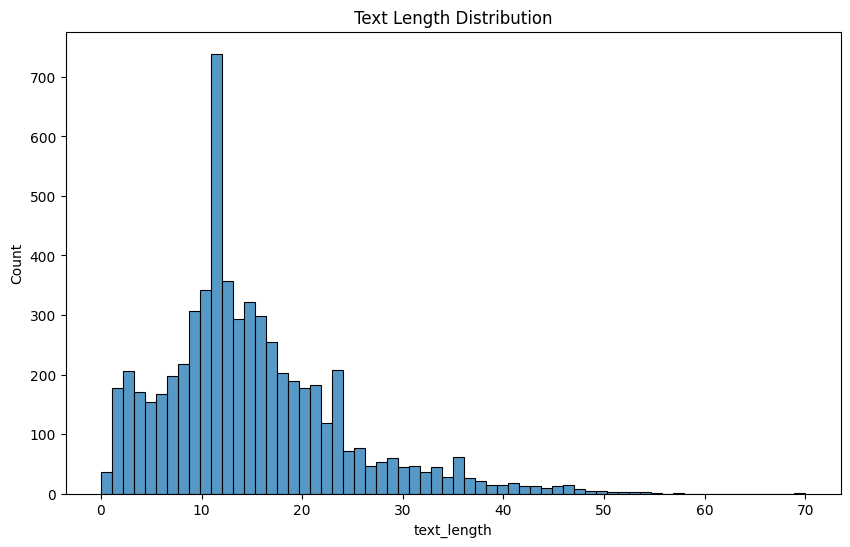

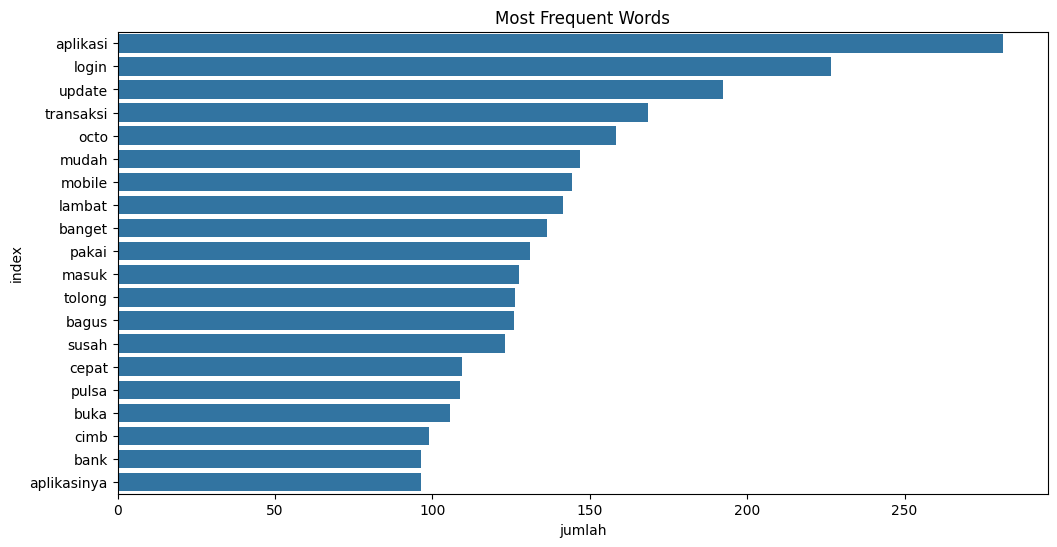

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

## **Ekstraksi Fitur dengan Tokenizer**

In [31]:
category = pd.get_dummies(clean_df.polarity, dtype=int)
new_df = pd.concat([clean_df, category], axis=1)
new_df = new_df.drop(columns='polarity')
new_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,...,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,text_length,negative,neutral,positive
0,95bb543f-5dc2-4459-8cea-91d7db5bf8c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Octomobile sangat keren dan luar biasa. Fiturnya sangat lengkap dan mudah di pergunakan. Semua tersedia dioctomobile. Layanan perbankan lengkap di tangan nasabah.Keren transaksi dimanapun dan kapanpun. Mudah diakses dan praktis sekali.,5,26,3.1.44,2025-04-01 10:58:30,Terima kasih atas bintang lima dan review nya. Senang sekali rasanya bahwa OCTO Mobile disukai. Terus gunakan OCTO Mobile untuk transaksi lebih praktis dan mudah di mana saja!\n,2025-04-01 11:16:30,...,octomobile sangat keren dan luar biasa fiturnya sangat lengkap dan mudah di pergunakan semua tersedia dioctomobile layanan perbankan lengkap di tangan nasabahkeren transaksi dimanapun dan kapanpun mudah diakses dan praktis sekali,octomobile sangat keren dan luar biasa fiturnya sangat lengkap dan mudah di pergunakan semua tersedia dioctomobile layanan perbankan lengkap di tangan nasabahkeren transaksi dimanapun dan kapanpun mudah diakses dan praktis sekali,"[octomobile, sangat, keren, dan, luar, biasa, fiturnya, sangat, lengkap, dan, mudah, di, pergunakan, semua, tersedia, dioctomobile, layanan, perbankan, lengkap, di, tangan, nasabahkeren, transaksi, dimanapun, dan, kapanpun, mudah, diakses, dan, praktis, sekali]","[octomobile, keren, fiturnya, lengkap, mudah, pergunakan, tersedia, dioctomobile, layanan, perbankan, lengkap, tangan, nasabahkeren, transaksi, dimanapun, mudah, diakses, praktis]",octomobile keren fiturnya lengkap mudah pergunakan tersedia dioctomobile layanan perbankan lengkap tangan nasabahkeren transaksi dimanapun mudah diakses praktis,20,18,0,0,1
1,4b324b78-5317-4c4c-86a8-98c24fb1d927,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi cimb ada bug di open aplikasi,dia stuck merah tidak sampe logo cimb..solusinya keluar bntar terus masuk lagi..bisa lewati logo kalo di sentuh layar tapi eror hp tidak bisa akses octo gitu..tolong lah..masa kek gtu doang developer kagak bisa benerin",1,6,3.1.44,2025-04-10 10:03:07,"Bapak/Ibu, mohon maaf atas ketidaknyamanan yang dialami. Untuk pemeriksaan lebih lanjut, mohon kesediaannya untuk mengirimkan email ke 14041@cimbniaga.co.id mengenai detail kendala yang dialami, beserta nama, nomor ponsel, dan screenshot error agar tim kami dapat melakukan pengecekan. Terima kasih.\n",2025-04-10 10:14:47,...,aplikasi cimb ada bug di open aplikasidia stuck merah tidak sampe logo cimbsolusinya keluar bntar terus masuk lagibisa lewati logo kalo di sentuh layar tapi eror hp tidak bisa akses octo gitutolong lahmasa kek gtu doang developer kagak bisa benerin,aplikasi cimb ada bug di open aplikasidia stuck merah tidak sampai logo cimbsolusinya keluar bntar terus masuk lagibisa lewati logo kalau di sentuh layar tapi eror hp tidak bisa akses octo gitutolong lahmasa seperti gtu doang developer tidak bisa benerin,"[aplikasi, cimb, ada, bug, di, open, aplikasidia, stuck, merah, tidak, sampai, logo, cimbsolusinya, keluar, bntar, terus, masuk, lagibisa, lewati, logo, kalau, di, sentuh, layar, tapi, eror, hp, tidak, bisa, akses, octo, gitutolong, lahmasa, seperti, gtu, doang, developer, tidak, bisa, benerin]","[aplikasi, cimb, bug, open, aplikasidia, stuck, merah, logo, cimbsolusinya, bntar, masuk, lagibisa, lewati, logo, sentuh, layar, eror, hp, akses, octo, gitutolong, lahmasa, gtu, doang, developer, benerin]",aplikasi cimb bug open aplikasidia stuck merah logo cimbsolusinya bntar masuk lagibisa lewati logo sentuh layar eror hp akses octo gitutolong lahmasa gtu doang developer benerin,-12,26,1,0,0
2,6fd45f04-82f9-4e2c-a77a-2bc59876486

In [32]:
new_df.to_csv('final.csv', index=False)

In [33]:
X = new_df['text_akhir'].values
y = new_df[['negative','positive','neutral']].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"X_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}")

X_train = (4856,), X_test = (1214,), y_train = (4856, 3), y_test = (1214, 3)


In [35]:
# Convert the numeric values in X_train and X_test to strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

In [36]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sequence_train, padding="post", truncating="post", maxlen=50)
padded_test = pad_sequences(sequence_test,  padding="post", truncating="post", maxlen=50)

In [44]:
new_df.to_csv('final_2.csv', index=False)

## Pembangunan Model

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
# Memuat dataset
df = pd.read_csv('final_2.csv')

In [39]:
# Menggunakan kolom "content" sebagai fitur dan "positive", "neutral", "negative" sebagai label
X = df["content"]
y = df[["negative", "positive"]].idxmax(axis=1)  # Mengambil kategori dengan nilai tertinggi

In [46]:
# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Model dengan Logistic Regression
pipeline_lr = make_pipeline(TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2)), LogisticRegression(max_iter=1000))
grid_search_lr = GridSearchCV(pipeline_lr, {'logisticregression__C': [0.1, 1, 10]}, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(max_df=0.9, min_df=5,
                                                        ngram_range=(1, 2))),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.1, 1, 10]},
             scoring='accuracy')

In [48]:
# Evaluasi model
models = {
    "Logistic Regression": grid_search_lr,

}

for model_name, model in models.items():
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'\nModel: {model_name}')
    print(f'Akurasi: {acc:.2f}')
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Akurasi: 0.85
Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.84      0.93      0.89       782
    positive       0.85      0.68      0.76       432

    accuracy                           0.85      1214
   macro avg       0.85      0.81      0.82      1214
weighted avg       0.85      0.85      0.84      1214

Confusion Matrix:
[[731  51]
 [137 295]]
